# GENERAL EXAMINATION, CLEANUP, and DATETIME INDEXING
Some ins and outs for:
examining data, 
cleaning and sorting, 
getting rid of null values, 
finding gaps,
creating a datetime index

In [1]:
%matplotlib inline
#%pylab inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print sys.version
print "Pandas:", pd.__version__

2.7.11 |Continuum Analytics, Inc.| (default, Feb 16 2016, 09:58:36) [MSC v.1500 64 bit (AMD64)]
Pandas: 0.17.0


Start by examining the data. List the data types, column headers

In [2]:
df = pd.read_csv('/Users/Peter/Documents/jupyter/mississippi.csv', parse_dates=['date'])
print df.dtypes
df.describe()

5s              object
15s              int64
date    datetime64[ns]
cfs            float64
10s             object
dtype: object


,15s,cfs
count,56921,56556.000000
mean,7010000,188109.256312
std,0,130131.082520
min,7010000,18000.000000
25%,7010000,93300.000000
50%,7010000,148000.000000
75%,7010000,242000.000000
max,7010000,1050000.000000


In [3]:
thecols = list(df.columns)
thecols

['5s', '15s', 'date', 'cfs', '10s']

In [3]:
#Select columns
cols_we_want = ['date', 'cfs']
df = df[cols_we_want]

In [5]:
#Slice with boolean if need be, e.g.
#df = df[df.StationId=='USGS 2093848']


In [4]:
renaming = {'Date':'date','CFS':'cfs'}
df = df.rename(columns=renaming)

In [5]:
df.count()

date    56921
cfs     56556
dtype: int64

In [6]:
#show missing values in a column
nulls = df[df.cfs.isnull()]
notnulls = df[df.cfs.notnull()]
description=pd.DataFrame([list(df.columns),list(notnulls.count()),list(nulls.count())])
description


,0,1
0,date,cfs
1,56556,56556
2,365,0


In [9]:
#sort and slice if you need to
#mysort = df.sort_values('date', ascending=True)
#mysort

In [7]:
df = df[df.cfs.notnull()]  #get rid of nulls in cfs column

In [8]:
df = df.set_index('date') #don't set_index more than once

In [21]:
first = df['1860-1':'1890-12'] #now we can slice by date
second = df['1891-1':'1920-12']
third = df['1921-1':'1950-12']
fourth = df['1951-1':'1980-12']
fifth = df['1981-1':'2010-12']
change = pd.Series(first, second, third, fourth, fifth)
change

TypeError: data type not understood

In [10]:
#to query particular values, must use loc
df.loc['1927-1-1']

cfs    127000
Name: 1927-01-01 00:00:00, dtype: float64

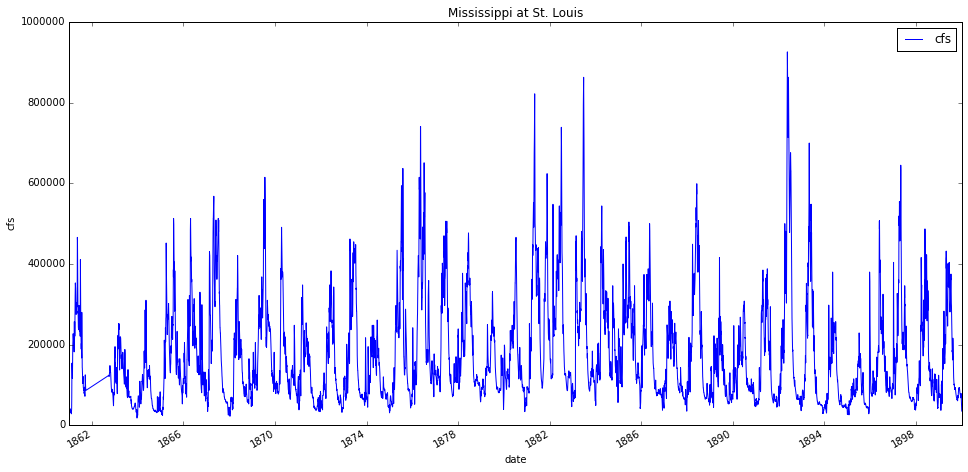

In [14]:
first.plot(title='Mississippi at St. Louis', figsize=(16,8))
plt.ylabel('cfs')


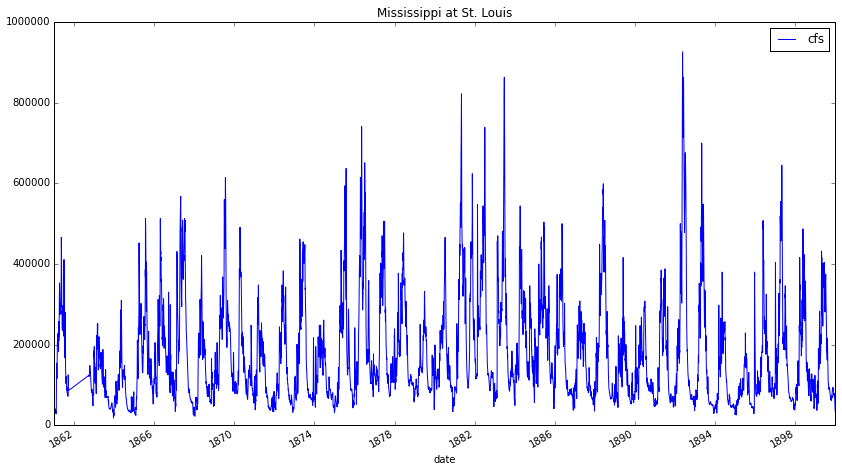

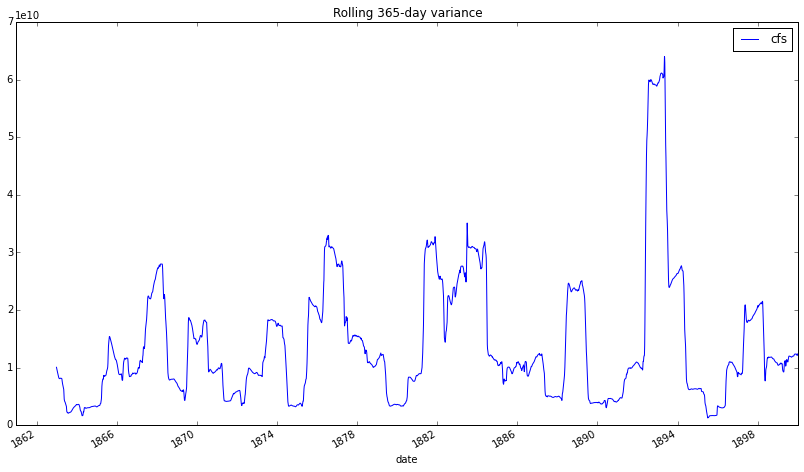

In [16]:
first.plot(figsize=(14,8), title="Mississippi at St. Louis")
pd.rolling_var(first, 365).plot(figsize=(14,8), title='Rolling 365-day variance')


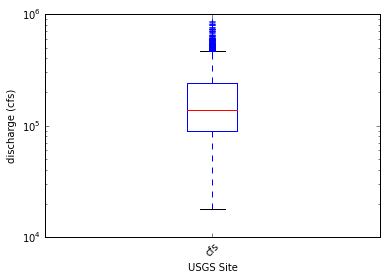

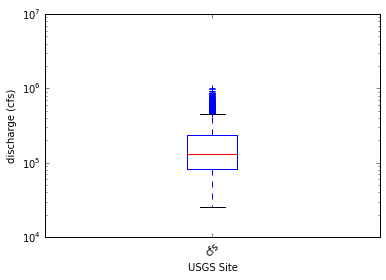

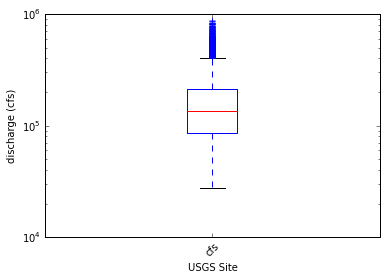

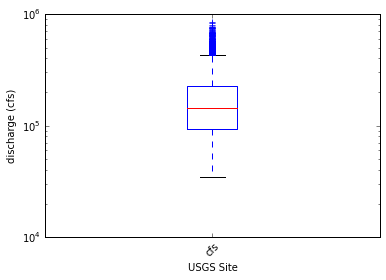

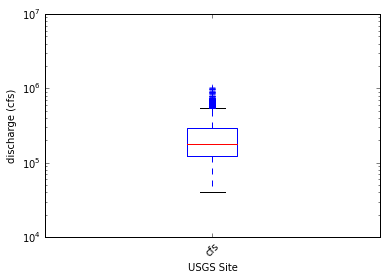

In [28]:
for item in change:
    plt.figure()
    item.plot(kind='box')
    plt.yscale('log')
    plt.xlabel('USGS Site')
    plt.xticks(rotation=45)
    plt.ylabel('discharge (cfs)')
    #plt.ylim((ymin,ymax))
    plt.show()
    plt.close()



In [ ]:
plt.figure()
            USGS_Site_Data[sites[j:j+n]].plot(kind='box')
            plt.title('Sites '+sites[j]+' to '+sites[j+n] )
            plt.yscale('log')
            plt.xlabel('USGS Site')
            plt.xticks(rotation=45)
            plt.ylabel('discharge (cfs)')
            plt.ylim((ymin,ymax))
            pdf.savefig()
            plt.show()
            plt.close()

In [35]:
df.reset_index().to_csv('/Users/Peter/Documents/jupyter/mississippi_flows.csv')